In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy as stats
from scipy.stats import pearsonr

In [8]:
df=pd.read_csv(r"C:/Users/Mutanu/Desktop/1. Weather Data.csv")
df.head

<bound method NDFrame.head of              Date/Time  Temp_C  Dew Point Temp_C  Rel Hum_%  Wind Speed_km/h  \
0        1/1/2012 0:00    -1.8              -3.9         86                4   
1        1/1/2012 1:00    -1.8              -3.7         87                4   
2        1/1/2012 2:00    -1.8              -3.4         89                7   
3        1/1/2012 3:00    -1.5              -3.2         88                6   
4        1/1/2012 4:00    -1.5              -3.3         88                7   
...                ...     ...               ...        ...              ...   
8779  12/31/2012 19:00     0.1              -2.7         81               30   
8780  12/31/2012 20:00     0.2              -2.4         83               24   
8781  12/31/2012 21:00    -0.5              -1.5         93               28   
8782  12/31/2012 22:00    -0.2              -1.8         89               28   
8783  12/31/2012 23:00     0.0              -2.1         86               30   

      Vis

In [51]:
rows,columns=df.shape
print(f"This dataset has {rows} rows and {columns} columns.")

This dataset has 8784 rows and 8 columns.


In [32]:
df.dtypes

Date/Time            object
Temp_C              float64
Dew Point Temp_C    float64
Rel Hum_%             int64
Wind Speed_km/h       int64
Visibility_km       float64
Press_kPa           float64
Weather              object
dtype: object

**The Weather Dataset is a collection of weather statistics with the following variables:**  
**Date/Time:** This is the time stamp for when each weather record was captured.  
**Temp_C:** Measure of Temperature in Celcius.   
**Dew Point Temp_C:** Measure of Dew point in Celcius.  
**Real Humidity:** measure of humidity level as a percentage.   
**Wind Speed_km/h:** measure of wind speed in kilometers per hour.  
**Visibility_km:** measure of visibility in kilometers.  
**Press_kPa:** measure of air pressure in kilopascals.  
**Weather:** A description of the weather pattern recorded.

In [49]:
df.info()
df.isna().sum().sum()
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date/Time         8784 non-null   object 
 1   Temp_C            8784 non-null   float64
 2   Dew Point Temp_C  8784 non-null   float64
 3   Rel Hum_%         8784 non-null   int64  
 4   Wind Speed_km/h   8784 non-null   int64  
 5   Visibility_km     8784 non-null   float64
 6   Press_kPa         8784 non-null   float64
 7   Weather           8784 non-null   object 
dtypes: float64(4), int64(2), object(2)
memory usage: 549.1+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date/Time         8784 non-null   object 
 1   Temp_C            8784 non-null   float64
 2   Dew Point Temp_C  8784 non-null   float64
 3   Rel Hum_%     

**_I ran the code above to check for any null or missing values. The dataset contains no null or missing values in any column._**

In [44]:
duplicates=df[df.duplicated()]
print(duplicates)

Duplicate Records:
Empty DataFrame
Columns: [Date/Time, Temp_C, Dew Point Temp_C, Rel Hum_%, Wind Speed_km/h, Visibility_km, Press_kPa, Weather]
Index: []


In [90]:
df["Date/Time"].duplicated().sum()

0

**_The codes above check and list duplicate values. I sampled the column "Date/Time" because I assume this variable should have no duplicate values in this dataset, and I can conclude that the dataset has no duplicates because the test gave the output of 0._**

In [91]:
df.describe()

,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa
count,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000
mean,8.798144,2.555294,67.431694,14.945469,27.664447,101.051623
std,11.687883,10.883072,16.918881,8.688696,12.622688,0.844005
min,-23.300000,-28.500000,18.000000,0.000000,0.200000,97.520000
25%,0.100000,-5.900000,56.000000,9.000000,24.100000,100.560000
50%,9.300000,3.300000,68.000000,13.000000,25.000000,101.070000
75%,18.800000,11.800000,81.000000,20.000000,25.000000,101.590000
max,33.000000,24.400000,100.000000,83.000000,48.300000,103.650000


In [92]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Temp_C,8784.0,8.798144,11.687883,-23.30,0.10,9.30,18.80,33.00
Dew Point Temp_C,8784.0,2.555294,10.883072,-28.50,-5.90,3.30,11.80,24.40
Rel Hum_%,8784.0,67.431694,16.918881,18.00,56.00,68.00,81.00,100.00
Wind Speed_km/h,8784.0,14.945469,8.688696,0.00,9.00,13.00,20.00,83.00
Visibility_km,8784.0,27.664447,12.622688,0.20,24.10,25.00,25.00,48.30
Press_kPa,8784.0,101.051623,0.844005,97.52,100.56,101.07,101.59,103.65


**_This is a statistical summary of the numerical features of the dataset._**

In [96]:
df['Weather']=df['Weather'].replace(to_replace='.*Drizzle.*',value='Drizzle',regex=True)
df['Weather']=df['Weather'].replace(to_replace='.*Cloudy.*',value='Cloudy',regex=True)
df['Weather']=df['Weather'].replace(to_replace='.*Rain.*',value='Rain',regex=True)
df['Weather']=df['Weather'].replace(to_replace='.*Clear.*',value='Clear',regex=True)
df['Weather']=df['Weather'].replace(to_replace='.*Snow.*',value='Snow',regex=True)
df['Weather']=df['Weather'].replace(to_replace='.*Fog.*',value='Fog',regex=True)
df['Weather']=df['Weather'].replace(to_replace='.*Haze.*',value='Haze',regex=True)
df['Weather']=df['Weather'].replace(to_replace='.*Thunderstorms.*',value='Thunderstorms',regex=True)

<Axes: xlabel='Weather', ylabel='Temp_C'>

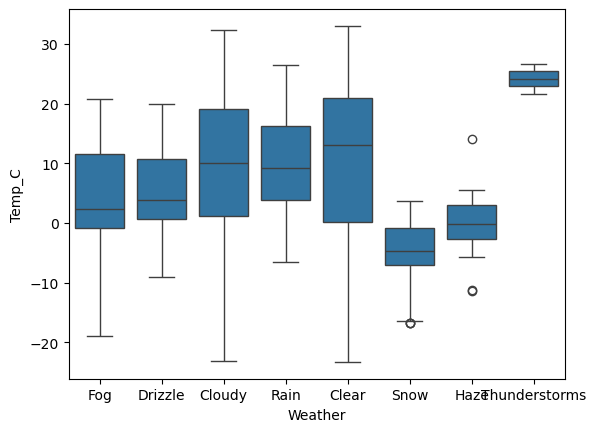

In [97]:
sns.boxplot(x="Weather",y="Temp_C",data=df)

**_The box plot above diplays the distribution of different weather conditions. It can be een that the distribution of temperature across all weather categories are distict. Outlier temperatures can be spotted in 'Snow' and 'Haze' weather categories._**

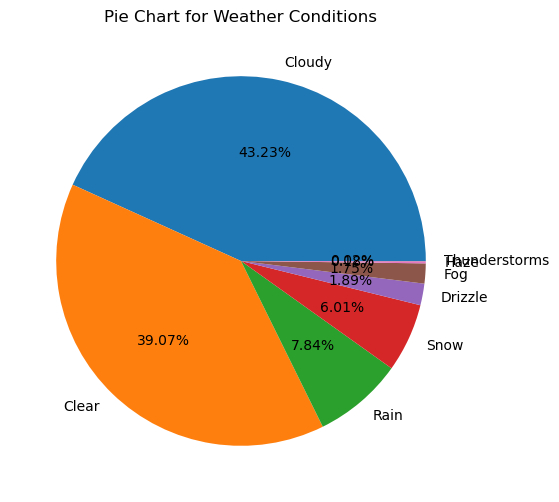

In [98]:
Weather_Condition=df["Weather"].value_counts()

plt.figure(figsize=(10,6))
plt.pie(Weather_Condition,labels=Weather.index,autopct='%1.2f%%')
plt.title('Pie Chart for Weather Conditions')
plt.show()

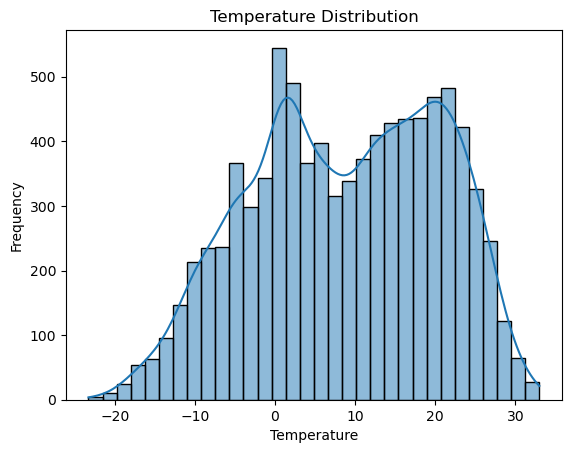

In [101]:
sns.histplot(df['Temp_C'],kde=True)
plt.title('Temperature Distribution')
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.show()

**_The Histogram above is a univariate analysis of the temperature distribution._**

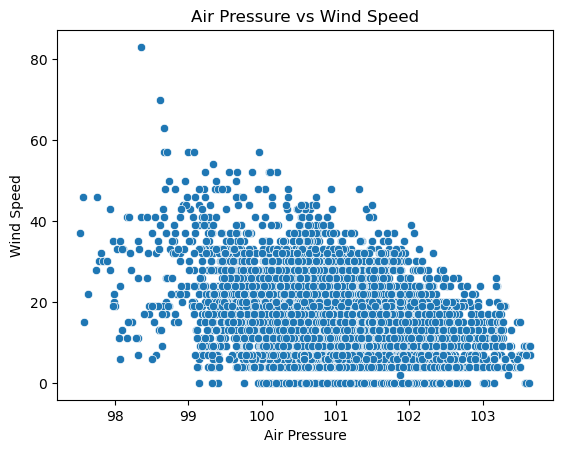

In [102]:
sns.scatterplot(data=df, x='Press_kPa', y='Wind Speed_km/h')
plt.title('Air Pressure vs Wind Speed')
plt.xlabel('Air Pressure')
plt.ylabel('Wind Speed')
plt.show()

**_This is a bivariate analysis of Air Pressure and Wind Speed variables._**